# Importing Libraires

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import nltk
import re
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import string
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Importing Dataset

In [3]:
dataset = pd.read_csv("dataset/training.csv")

# EDA

In [4]:
dataset.head()

,Id,title,text,subject,date,label
0,13970,WATCH: Paul Manafort Gets DESTROYED On CNN Fo...,"Paul Manafort, the chair of Donald Trump s cam...",News,"August 14, 2016",1
1,41668,REFUGEE BUSINESS IS CASH COW FOR LUTHERAN CHAR...,How very charitable of the Lutheran and Cath...,left-news,"May 8, 2015",1
2,26810,Trump’s Excuse For All His Sexist Statements ...,In case you ve been living under a rock for yo...,News,"March 28, 2016",1
3,30967,'Jihadi Gran' gets 10 years after joining son ...,PARIS (Reuters) - A court on Friday sentenced ...,worldnews,"October 6, 2017",0
4,26072,New Czech government to seek confidence vote o...,PRAGUE (Reuters) - The Czech government will s...,worldnews,"December 13, 2017",0


In [5]:
dataset.shape

(31428, 6)

In [6]:
dataset.describe()

,Id,label
count,31428.000000,31428.000000
mean,22501.046583,0.524278
std,12920.198866,0.499418
min,2.000000,0.000000
25%,11317.750000,0.000000
50%,22504.500000,1.000000
75%,33684.250000,1.000000
max,44897.000000,1.000000


In [7]:
dataset.isnull().sum()

Id         0
title      0
text       0
subject    0
date       0
label      0
dtype: int64

# Data Visualization

<AxesSubplot:xlabel='label', ylabel='count'>

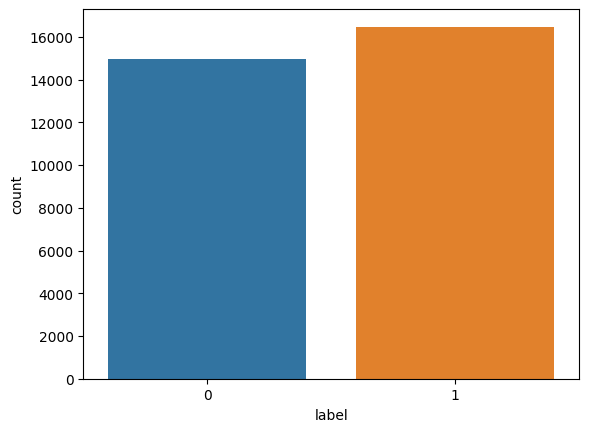

In [8]:
sns.countplot(x = 'label',data = dataset)

In [9]:
dataset

,Id,title,text,subject,date,label
0,13970,WATCH: Paul Manafort Gets DESTROYED On CNN Fo...,"Paul Manafort, the chair of Donald Trump s cam...",News,"August 14, 2016",1
1,41668,REFUGEE BUSINESS IS CASH COW FOR LUTHERAN CHAR...,How very charitable of the Lutheran and Cath...,left-news,"May 8, 2015",1
2,26810,Trump’s Excuse For All His Sexist Statements ...,In case you ve been living under a rock for yo...,News,"March 28, 2016",1
3,30967,'Jihadi Gran' gets 10 years after joining son ...,PARIS (Reuters) - A court on Friday sentenced ...,worldnews,"October 6, 2017",0
4,26072,New Czech government to seek confidence vote o...,PRAGUE (Reuters) - The Czech government will s...,worldnews,"December 13, 2017",0
...,...,...,...,...,...,...
31423,11284,CHICAGO TRUMP RALLY CANCELLED: Radicals And BL...,"A huge rally of 10,000 Chicagoans didn t get t...",politics,"Mar 11, 2016",1
31424,44732,Trump supports completion of Dakota Access Pip...,WASHINGTON (Reuters) - U.S. President-elect Do...,politicsNews,"December 5, 2016",0
31425,38158,Obama Can’t Stop Winning As New Jobs Report S...,"Today, I would hate to be a Republican strateg...",News,"January 8, 2016",1
31426,860,Turkey bank regulator dismisses 'rumors' after...,ANKARA (Reuters) - Turkey s banking regulator ...,worldnews,"October 21, 2017",0


In [10]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

# Model Building

In [11]:
dataset = dataset.drop(['Id','title','subject','date'], axis = 1)

In [12]:
dataset.head()

,text,label
0,"Paul Manafort, the chair of Donald Trump s cam...",1
1,How very charitable of the Lutheran and Cath...,1
2,In case you ve been living under a rock for yo...,1
3,PARIS (Reuters) - A court on Friday sentenced ...,0
4,PRAGUE (Reuters) - The Czech government will s...,0


In [13]:
dataset = dataset.dropna()

In [14]:
dataset.isnull().sum()

text     0
label    0
dtype: int64

In [15]:
dataset['text'][0]

'Paul Manafort, the chair of Donald Trump s campaign, got slammed by Jake Tapper during a segment on CNN s State of the Union Sunday morning. Manafort attempted to excuse Trump s comment earlier this week regarding Hillary Clinton. During a campaign event in Wilmington, North Carolina, Trump suggested that should Clinton be elected, it might be up to  Second Amendment people  to take matters into their own hands and stop her before she gets rid of the Second Amendment. If she gets to pick her judges, nothing you can do folks. Although the Second Amendment people maybe there is, I don t know,  Trump said on Tuesday.Since then, Trump and his campaign have received a significant blowback from the comments. Trump and Manafort have blamed the matter on the media, insisting they are twisting Trump s words. Those claims are repeated during the segment. Host Jake Tapper said to Manafort: Here s the thing, it wasn t just reporters. It was Republicans, it was people in Washington, D.C. who want 

In [16]:
X = dataset['text']
y = dataset['label']

In [17]:
# remove all numbers with letters attached to them
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

# '[%s]' % re.escape(string.punctuation),' ' - replace punctuation with white space
# .lower() - convert all strings to lowercase 
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Remove all '\n' in the string and replace it with a space
remove_n = lambda x: re.sub("\n", " ", x)

# Remove all non-ascii characters 
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

# Apply all the lambda functions wrote previously through .map on the comments column
dataset['text'] = dataset['text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [18]:
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(X).toarray()

In [19]:
X 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 3, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [20]:
joblib.dump(cv, "cv.pkl")

['cv.pkl']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
predictions = LR.predict(X_test)
Val1=(accuracy_score(y_test, predictions)*100)
print("*Accuracy score for LR: ", Val1, "\n")
print("*Confusion Matrix for LR: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for LR: ")
print(classification_report(y_test, predictions))

*Accuracy score for LR:  99.45911549475024 

*Confusion Matrix for LR: 
[[1549    8]
 [   9 1577]]
*Classification Report for LR: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1557
           1       0.99      0.99      0.99      1586

    accuracy                           0.99      3143
   macro avg       0.99      0.99      0.99      3143
weighted avg       0.99      0.99      0.99      3143



In [23]:
LR_acc = accuracy_score(y_test, predictions)
LR_prec = precision_score(y_test, predictions,average='weighted')
LR_rec = recall_score(y_test, predictions,average='weighted')
LR_f1 = f1_score(y_test, predictions,average='weighted')
storeResults('Logistic Regression',LR_acc,LR_prec,LR_rec,LR_f1)

# Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
val2 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for RF: ", val2, "\n")
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for RF: ")
print(classification_report(y_test, predictions))

*Accuracy score for RF:  99.71364937957365 

*Confusion Matrix for RF: 
[[1554    3]
 [   6 1580]]
*Classification Report for RF: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1557
           1       1.00      1.00      1.00      1586

    accuracy                           1.00      3143
   macro avg       1.00      1.00      1.00      3143
weighted avg       1.00      1.00      1.00      3143



In [25]:
RF_acc = accuracy_score(y_test, predictions)
RF_prec = precision_score(y_test, predictions,average='weighted')
RF_rec = recall_score(y_test, predictions,average='weighted')
RF_f1 = f1_score(y_test, predictions,average='weighted')
storeResults('Random Forest',RF_acc,RF_prec,RF_rec,RF_f1)

# Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)
predictions = GNB.predict(X_test)
val3 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for GNB: ", val3, "\n")
print("*Confusion Matrix for GNB: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for GNB: ")
print(classification_report(y_test, predictions))

*Accuracy score for GNB:  86.89150493159403 

*Confusion Matrix for GNB: 
[[1432  125]
 [ 287 1299]]
*Classification Report for GNB: 
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1557
           1       0.91      0.82      0.86      1586

    accuracy                           0.87      3143
   macro avg       0.87      0.87      0.87      3143
weighted avg       0.87      0.87      0.87      3143



In [27]:
NB_acc = accuracy_score(y_test, predictions)
NB_prec = precision_score(y_test, predictions,average='weighted')
NB_rec = recall_score(y_test, predictions,average='weighted')
NB_f1 = f1_score(y_test, predictions,average='weighted')
storeResults('Naive Bayes',NB_acc,NB_prec,NB_rec,NB_f1)

# SVM

In [28]:
from sklearn.svm import LinearSVC
SVM = LinearSVC(random_state=0, tol=1e-5)
SVM.fit(X_train, y_train)
predictions = SVM.predict(X_test)
val4 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for SVM: ", val4, "\n")
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for SVM: ")
print(classification_report(y_test, predictions))

*Accuracy score for SVM:  99.07731466751511 

*Confusion Matrix for SVM: 
[[1543   14]
 [  15 1571]]
*Classification Report for SVM: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1557
           1       0.99      0.99      0.99      1586

    accuracy                           0.99      3143
   macro avg       0.99      0.99      0.99      3143
weighted avg       0.99      0.99      0.99      3143



In [29]:
SVM_acc = accuracy_score(y_test, predictions)
SVM_prec = precision_score(y_test, predictions,average='weighted')
SVM_rec = recall_score(y_test, predictions,average='weighted')
SVM_f1 = f1_score(y_test, predictions,average='weighted')
storeResults('SVM',SVM_acc,SVM_prec,SVM_rec,SVM_f1)

# MLP

In [30]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
val6 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for MLP: ", val6, "\n")
print("*Confusion Matrix for MLP: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for MLP: ")
print(classification_report(y_test, predictions))

*Accuracy score for MLP:  99.4272987591473 

*Confusion Matrix for MLP: 
[[1553    4]
 [  14 1572]]
*Classification Report for MLP: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1557
           1       1.00      0.99      0.99      1586

    accuracy                           0.99      3143
   macro avg       0.99      0.99      0.99      3143
weighted avg       0.99      0.99      0.99      3143



In [31]:
MLP_acc = accuracy_score(y_test, predictions)
MLP_prec = precision_score(y_test, predictions,average='weighted')
MLP_rec = recall_score(y_test, predictions,average='weighted')
MLP_f1 = f1_score(y_test, predictions,average='weighted')
storeResults('MLP',MLP_acc,MLP_prec,MLP_rec,MLP_f1)

# Voting Classifier

In [32]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
estimator = []
estimator.append(('RF', 
                  RandomForestClassifier()))
estimator.append(('SVC', LinearSVC(random_state=0, tol=1e-5)))
estimator.append(('GNB', GaussianNB()))
estimator.append(('LR', LogisticRegression()))


  
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train, y_train)
predictions = vot_hard.predict(X_test)
  
val5 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for Voting Classifier: ", val5, "\n")
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for Voting Classifier: ")
print(classification_report(y_test, predictions))

*Accuracy score for Voting Classifier:  99.96818326439707 

*Confusion Matrix for Voting Classifier: 
[[1557    0]
 [   1 1585]]
*Classification Report for Voting Classifier: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1557
           1       1.00      1.00      1.00      1586

    accuracy                           1.00      3143
   macro avg       1.00      1.00      1.00      3143
weighted avg       1.00      1.00      1.00      3143



In [33]:
VC_acc = accuracy_score(y_test, predictions)
VC_prec = precision_score(y_test, predictions,average='weighted')
VC_rec = recall_score(y_test, predictions,average='weighted')
VC_f1 = f1_score(y_test, predictions,average='weighted')
storeResults('Voting Classifier',VC_acc,VC_prec,VC_rec,VC_f1)

# Comparison

In [34]:
import pandas as pd
import numpy as np
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1score,
                        'Recall'   : recall,
                        'Precision': precision
                       
                        
                      })

In [35]:
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.995,0.995,0.995,0.995
1,Random Forest,0.997,0.997,0.997,0.997
2,Naive Bayes,0.869,0.869,0.869,0.873
3,SVM,0.991,0.991,0.991,0.991
4,MLP,0.994,0.994,0.994,0.994
5,Voting Classifier,1.000,1.000,1.000,1.000


# Modelling

In [36]:
joblib.dump(vot_hard , "model1.pkl")

['model1.pkl']

# Graphs

In [37]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

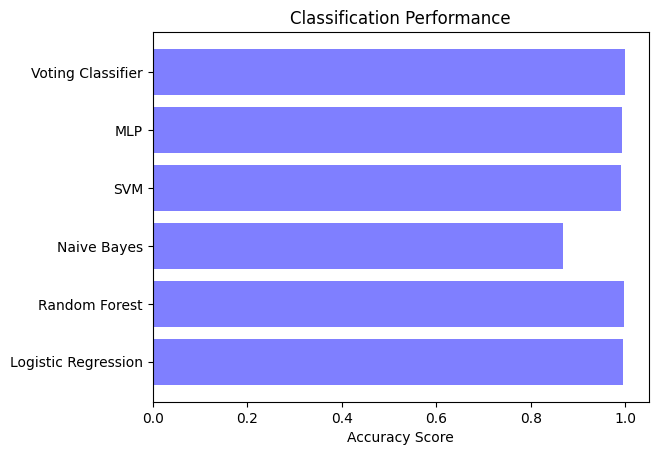

In [38]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

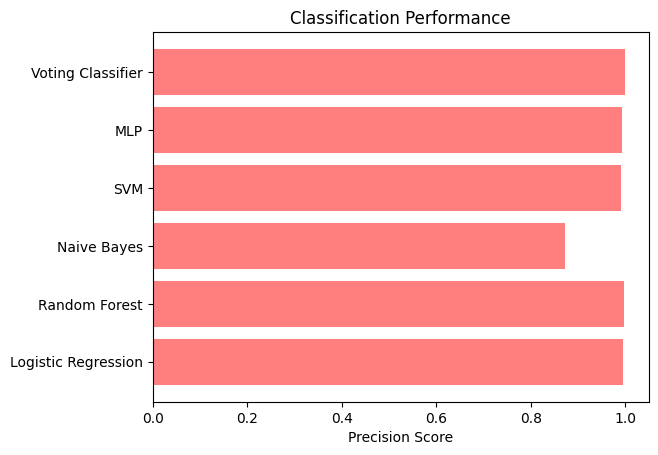

In [39]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

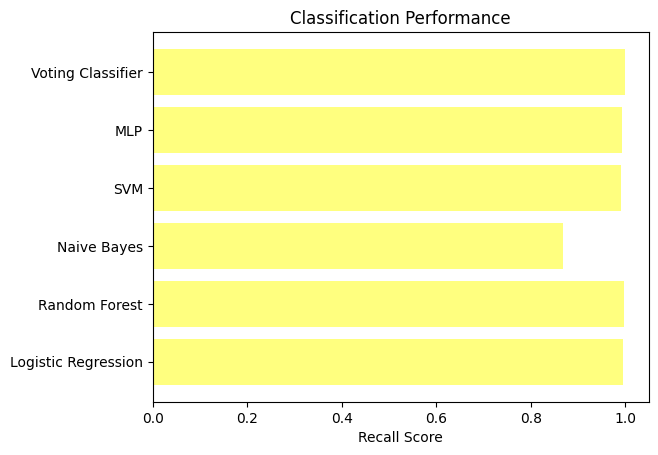

In [40]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

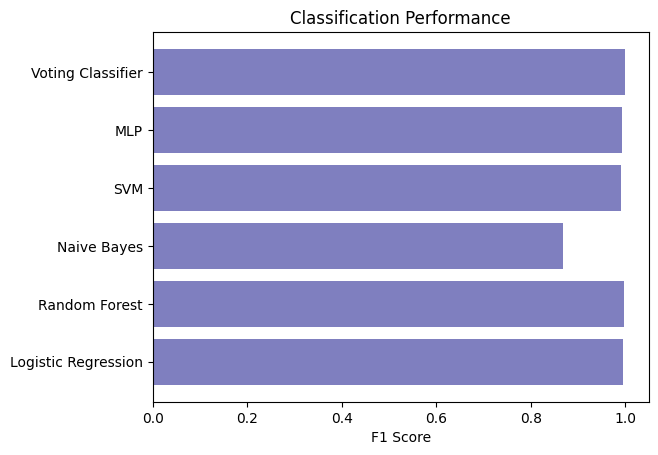

In [41]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()